In [67]:
# Load necessary packages
library(ggplot2)
library(psych)
library(dplyr)
library(fmsb)
library(ggradar)
library(plotrix)

In [68]:
data <- read.csv("/home/mtweed/scratch/ukb_category_109_bis.csv")
ad_subj_data <- read.csv("~/scratch/tractoflow_hcp_dwi/linear_regression/UKBB_ad_data_other.csv")
fa_subj_data <- read.csv("~/scratch/tractoflow_hcp_dwi/linear_regression/UKBB_fa_data_other.csv")
md_subj_data <- read.csv("~/scratch/tractoflow_hcp_dwi/linear_regression/UKBB_md_data_other.csv")
rd_subj_data <- read.csv("~/scratch/tractoflow_hcp_dwi/linear_regression/UKBB_rd_data_other.csv")

In [69]:
names(data)[names(data) == 'X24483.2.0'] <- 't2_sub_nigra_right'
names(data)[names(data) == 'X24484.2.0'] <- 't2_sub_nigra_left'
names(data)[names(data) == 'X24479.2.0'] <- 'mms_accumbens_left'
names(data)[names(data) == 'X24480.2.0'] <- 'mms_accumbens_right'
names(data)[names(data) == 'X24477.2.0'] <- 'mms_amygdala_left'
names(data)[names(data) == 'X24478.2.0'] <- 'mms_amygdala_right'
names(data)[names(data) == 'X24469.2.0'] <- 'mms_caudate_left'
names(data)[names(data) == 'X24470.2.0'] <- 'mms_caudate_right'
names(data)[names(data) == 'X24475.2.0'] <- 'mms_hipp_left'
names(data)[names(data) == 'X24476.2.0'] <- 'mms_hipp_right'
names(data)[names(data) == 'X24473.2.0'] <- 'mms_pallidum_left'
names(data)[names(data) == 'X24474.2.0'] <- 'mms_pallidum_right'
names(data)[names(data) == 'X24471.2.0'] <- 'mms_putamen_left'
names(data)[names(data) == 'X24472.2.0'] <- 'mms_putamen_right'
names(data)[names(data) == 'X24481.2.0'] <- 'mms_sub_nigra_left'
names(data)[names(data) == 'X24482.2.0'] <- 'mms_sub_nigra_right'
names(data)[names(data) == 'X24467.2.0'] <- 'mms_thalamus_left'
names(data)[names(data) == 'X24468.2.0'] <- 'mms_thalamus_right'

data$t2_sub_nigra <- rowMeans(data[c('t2_sub_nigra_right' ,'t2_sub_nigra_left')], na.rm = TRUE)
data$mms_accumbens <- rowMeans(data[c('mms_accumbens_left' ,'mms_accumbens_right')], na.rm = TRUE)
data$mms_amygdala <- rowMeans(data[c('mms_amygdala_left' ,'mms_amygdala_right')], na.rm = TRUE)
data$mms_caudate <- rowMeans(data[c('mms_caudate_left' ,'mms_caudate_right')], na.rm = TRUE)
data$mms_hipp <- rowMeans(data[c('mms_hipp_left' ,'mms_hipp_right')], na.rm = TRUE)
data$mms_pallidum <- rowMeans(data[c('mms_pallidum_left' ,'mms_pallidum_right')], na.rm = TRUE)
data$mms_putamen <- rowMeans(data[c('mms_putamen_left' ,'mms_putamen_right')], na.rm = TRUE)
data$mms_sub_nigra <- rowMeans(data[c('mms_sub_nigra_left' ,'mms_sub_nigra_right')], na.rm = TRUE)
data$mms_thalamus <- rowMeans(data[c('mms_thalamus_left' ,'mms_thalamus_right')], na.rm = TRUE)

In [70]:
swi_data <- data[c('eid', 't2_sub_nigra' ,'mms_accumbens' ,'mms_amygdala' ,'mms_caudate' ,'mms_hipp' ,'mms_pallidum' ,'mms_putamen' ,'mms_sub_nigra' ,'mms_thalamus')]
colnames(swi_data)[colnames(swi_data) == "eid"] <- "Subject_ID"
ad_subj_data=merge(ad_subj_data, swi_data)
fa_subj_data=merge(fa_subj_data, swi_data)
md_subj_data=merge(md_subj_data, swi_data)
rd_subj_data=merge(rd_subj_data, swi_data)

In [71]:
# Define necessary variables
subject_data <- list(ad_subj_data, fa_subj_data, md_subj_data, rd_subj_data)
subject_datasets <- c("ad", "fa", "md", "rd")
brain_regions <- c("t2_sub_nigra", "mms_accumbens", "mms_amygdala", "mms_caudate", "mms_hipp", "mms_pallidum", "mms_putamen", "mms_sub_nigra", "mms_thalamus")
vars <- c("BMI", "CRP", "Glucose", "HBA1C", "Cholesterol", "HDL_Chol", "LDL_Chol", "Triglycerides", "Systolic_BP", "Diastolic_BP")
variables <- c("body_mass_index_bmi_21001.2.0", "c.reactive_protein_30710.0.0", 
                        "glucose_30740.0.0", "glycated_haemoglobin_hba1c_30750.0.0", 
                        "cholesterol_30690.0.0", "hdl_cholesterol_30760.0.0", 
                        "ldl_direct_30780.0.0", "triglycerides_30870.0.0", 
                        "systolic_blood_pressure_automated_reading_4080.0.1", 
                        "diastolic_blood_pressure_automated_reading_4079.0.1")
all_data_summary <- data.frame()

# Loop through the DTI measure data frames
for (i in seq_along(subject_data)) {
    current_data <- subject_data[[i]]
    j=1
    # Loop through each brain region
    for (region in brain_regions) {
        k=1
        # Loop through each obesity-related parameter
        for (variable in variables) {
            # Calculate regression for current region, parameter, and data frame
            lm_model <- lm(get(region) ~ get(variable) + 
                           age_when_attended_assessment_centre_21003.2.0 + 
                           poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) * sex_31.0.0 +
                           poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0),
                                min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) + 
                           uk_biobank_assessment_centre_54.2.0 + 
                           volume_of_estimatedtotalintracranial_whole_brain_26521.2.0, data = current_data)
            summary_model <- summary(lm_model)
            values <- data.frame(summary_model$coefficients[2,])
            values <- as.data.frame(t(values))
            # Create necessary columns to make the data frame more readable
            values$metric <- subject_datasets[i]
            values$region <- region
            values$measure <- vars[k]
            # Rename row names to relevant patient information
            row_name <- paste(subject_datasets[i],"_", region, "_", variable)
            rownames(values) <- row_name 
            all_data_summary <- rbind(all_data_summary, values)
            k=k+1
        j=j+1
        }
    }
}
write.csv(all_data_summary, "~/scratch/tractoflow_hcp_dwi/linear_regression/UKBB_SWI_data_summary.csv")

In [72]:
all_data_summary <- read.csv("~/scratch/tractoflow_hcp_dwi/linear_regression/UKBB_SWI_data_summary.csv")

In [85]:
colnames(all_data_summary)[colnames(all_data_summary) == "Pr...t.."] <- "p.value"

# Loading UKBB summarized data and separating it based on ROI
t2_sub_nigra_data_summary <- all_data_summary[all_data_summary$region == 't2_sub_nigra',]
mms_accumbens_data_summary <- all_data_summary[all_data_summary$region == 'mms_accumbens',]
mms_amygdala_data_summary <- all_data_summary[all_data_summary$region == 'mms_amygdala',]
mms_caudate_data_summary <- all_data_summary[all_data_summary$region == 'mms_caudate',]
mms_hipp_data_summary <- all_data_summary[all_data_summary$region == 'mms_hipp',]
mms_pallidum_data_summary <- all_data_summary[all_data_summary$region == 'mms_pallidum',]
mms_putamen_data_summary <- all_data_summary[all_data_summary$region == 'mms_putamen',]
mms_sub_nigra_data_summary <- all_data_summary[all_data_summary$region == 'mms_sub_nigra',]
mms_thalamus_data_summary <- all_data_summary[all_data_summary$region == 'mms_thalamus',]

# Adjusting the p-value separately for each ROI to account for multiple comparisons
t2_sub_nigra_data_summary$p_fdr = p.adjust(t2_sub_nigra_data_summary$'p.value', method="fdr")
mms_accumbens_data_summary$p_fdr = p.adjust(mms_accumbens_data_summary$'p.value', method="fdr")
mms_amygdala_data_summary$p_fdr = p.adjust(mms_amygdala_data_summary$'p.value', method="fdr")
mms_caudate_data_summary$p_fdr = p.adjust(mms_caudate_data_summary$'p.value', method="fdr")
mms_hipp_data_summary$p_fdr = p.adjust(mms_hipp_data_summary$'p.value', method="fdr")
mms_pallidum_data_summary$p_fdr = p.adjust(mms_pallidum_data_summary$'p.value', method="fdr")
mms_putamen_data_summary$p_fdr = p.adjust(mms_putamen_data_summary$'p.value', method="fdr")
mms_sub_nigra_data_summary$p_fdr = p.adjust(mms_sub_nigra_data_summary$'p.value', method="fdr")
mms_thalamus_data_summary$p_fdr = p.adjust(mms_thalamus_data_summary$'p.value', method="fdr")

# Rebinding all the data into one dataframe
all_data_summary <- data.frame()
all_data_summary <- bind_rows(t2_sub_nigra_data_summary, mms_accumbens_data_summary)
all_data_summary <- bind_rows(all_data_summary, mms_amygdala_data_summary)
all_data_summary <- bind_rows(all_data_summary, mms_caudate_data_summary)
all_data_summary <- bind_rows(all_data_summary, mms_hipp_data_summary)
all_data_summary <- bind_rows(all_data_summary, mms_pallidum_data_summary)
all_data_summary <- bind_rows(all_data_summary, mms_putamen_data_summary)
all_data_summary <- bind_rows(all_data_summary, mms_sub_nigra_data_summary)
all_data_summary <- bind_rows(all_data_summary, mms_thalamus_data_summary)

In [87]:
# Defining variables for looping through dataframe columns and for radarchart titles
brain_regions <- c("t2_sub_nigra", "mms_accumbens", "mms_amygdala", "mms_caudate", "mms_hipp", "mms_pallidum", "mms_putamen", "mms_sub_nigra", "mms_thalamus")
regions <- c("T2 Substantia Nigra", "MMS Accumbens", "MMS Amygdala", "MMS Caudate", "MMS Hippocampus", "MMS Pallidum", "MMS Putamen", "MMS Substantia Nigra", "MMS Thalamus")

In [88]:
# Separating dataframe based on obesity-related parameters of interest
BMI_data <- all_data_summary[all_data_summary$measure == 'BMI',] 
CRP_data <- all_data_summary[all_data_summary$measure == 'CRP',] 
glucose_data <- all_data_summary[all_data_summary$measure == 'Glucose',] 
hba1c_data <- all_data_summary[all_data_summary$measure == 'HBA1C',] 
chol_data <- all_data_summary[all_data_summary$measure == 'Cholesterol',] 
hdl_chol_data <- all_data_summary[all_data_summary$measure == 'HDL_Chol',] 
ldl_chol_data <- all_data_summary[all_data_summary$measure == 'LDL_Chol',] 
triglycerides_data <- all_data_summary[all_data_summary$measure == 'Triglycerides',] 
sys_bp_data <- all_data_summary[all_data_summary$measure == 'Systolic_BP',] 
dia_bp_data <- all_data_summary[all_data_summary$measure == 'Diastolic_BP',] 

# Isolating T2 substantia nigra data for each DTI measure
ad_t2_sub_nigra_data <- all_data_summary[all_data_summary$metric == 'ad' & all_data_summary$region == 't2_sub_nigra',] 
fa_t2_sub_nigra_data <- all_data_summary[all_data_summary$metric == 'fa' & all_data_summary$region == 't2_sub_nigra',] 
md_t2_sub_nigra_data <- all_data_summary[all_data_summary$metric == 'md' & all_data_summary$region == 't2_sub_nigra',] 
rd_t2_sub_nigra_data <- all_data_summary[all_data_summary$metric == 'rd' & all_data_summary$region == 't2_sub_nigra',] 

# Isolating accumbens data for each DTI measure
ad_mms_accumbens_data <- all_data_summary[all_data_summary$metric == 'ad' & all_data_summary$region == 'mms_accumbens',] 
fa_mms_accumbens_data <- all_data_summary[all_data_summary$metric == 'fa' & all_data_summary$region == 'mms_accumbens',] 
md_mms_accumbens_data <- all_data_summary[all_data_summary$metric == 'md' & all_data_summary$region == 'mms_accumbens',] 
rd_mms_accumbens_data <- all_data_summary[all_data_summary$metric == 'rd' & all_data_summary$region == 'mms_accumbens',]

# Isolating amygdala data for each DTI measure
ad_mms_amygdala_data <- all_data_summary[all_data_summary$metric == 'ad' & all_data_summary$region == 'mms_amygdala',] 
fa_mms_amygdala_data <- all_data_summary[all_data_summary$metric == 'fa' & all_data_summary$region == 'mms_amygdala',] 
md_mms_amygdala_data <- all_data_summary[all_data_summary$metric == 'md' & all_data_summary$region == 'mms_amygdala',] 
rd_mms_amygdala_data <- all_data_summary[all_data_summary$metric == 'rd' & all_data_summary$region == 'mms_amygdala',]

# Isolating caudate data for each DTI measure
ad_mms_caudate_data <- all_data_summary[all_data_summary$metric == 'ad' & all_data_summary$region == 'mms_caudate',] 
fa_mms_caudate_data <- all_data_summary[all_data_summary$metric == 'fa' & all_data_summary$region == 'mms_caudate',] 
md_mms_caudate_data <- all_data_summary[all_data_summary$metric == 'md' & all_data_summary$region == 'mms_caudate',] 
rd_mms_caudate_data <- all_data_summary[all_data_summary$metric == 'rd' & all_data_summary$region == 'mms_caudate',]

# Isolating hippocampus data for each DTI measure
ad_mms_hipp_data <- all_data_summary[all_data_summary$metric == 'ad' & all_data_summary$region == 'mms_hipp',] 
fa_mms_hipp_data <- all_data_summary[all_data_summary$metric == 'fa' & all_data_summary$region == 'mms_hipp',] 
md_mms_hipp_data <- all_data_summary[all_data_summary$metric == 'md' & all_data_summary$region == 'mms_hipp',] 
rd_mms_hipp_data <- all_data_summary[all_data_summary$metric == 'rd' & all_data_summary$region == 'mms_hipp',]

# Isolating pallidum data for each DTI measure
ad_mms_pallidum_data <- all_data_summary[all_data_summary$metric == 'ad' & all_data_summary$region == 'mms_pallidum',] 
fa_mms_pallidum_data <- all_data_summary[all_data_summary$metric == 'fa' & all_data_summary$region == 'mms_pallidum',] 
md_mms_pallidum_data <- all_data_summary[all_data_summary$metric == 'md' & all_data_summary$region == 'mms_pallidum',] 
rd_mms_pallidum_data <- all_data_summary[all_data_summary$metric == 'rd' & all_data_summary$region == 'mms_pallidum',]

# Isolating putamen data for each DTI measure
ad_mms_putamen_data <- all_data_summary[all_data_summary$metric == 'ad' & all_data_summary$region == 'mms_putamen',] 
fa_mms_putamen_data <- all_data_summary[all_data_summary$metric == 'fa' & all_data_summary$region == 'mms_putamen',] 
md_mms_putamen_data <- all_data_summary[all_data_summary$metric == 'md' & all_data_summary$region == 'mms_putamen',] 
rd_mms_putamen_data <- all_data_summary[all_data_summary$metric == 'rd' & all_data_summary$region == 'mms_putamen',]

# Isolating substantia nira data for each DTI measure
ad_mms_sub_nigra_data <- all_data_summary[all_data_summary$metric == 'ad' & all_data_summary$region == 'mms_sub_nigra',] 
fa_mms_sub_nigra_data <- all_data_summary[all_data_summary$metric == 'fa' & all_data_summary$region == 'mms_sub_nigra',] 
md_mms_sub_nigra_data <- all_data_summary[all_data_summary$metric == 'md' & all_data_summary$region == 'mms_sub_nigra',] 
rd_mms_sub_nigra_data <- all_data_summary[all_data_summary$metric == 'rd' & all_data_summary$region == 'mms_sub_nigra',]

# Isolating thalamus data for each DTI measure
ad_mms_thalamus_data <- all_data_summary[all_data_summary$metric == 'ad' & all_data_summary$region == 'mms_thalamus',] 
fa_mms_thalamus_data <- all_data_summary[all_data_summary$metric == 'fa' & all_data_summary$region == 'mms_thalamus',] 
md_mms_thalamus_data <- all_data_summary[all_data_summary$metric == 'md' & all_data_summary$region == 'mms_thalamus',] 
rd_mms_thalamus_data <- all_data_summary[all_data_summary$metric == 'rd' & all_data_summary$region == 'mms_thalamus',]

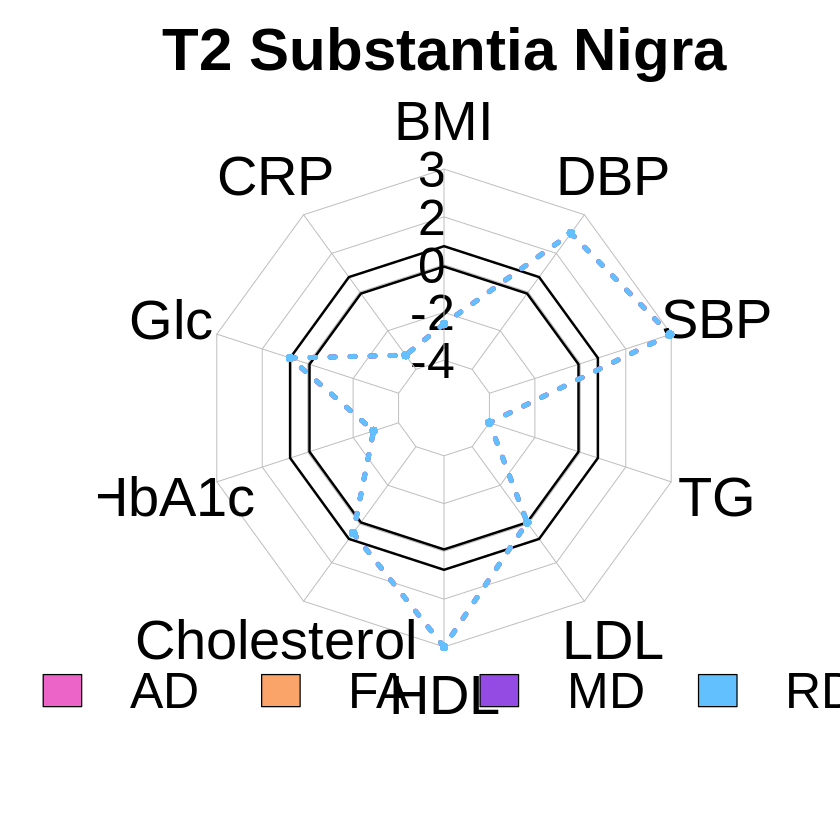

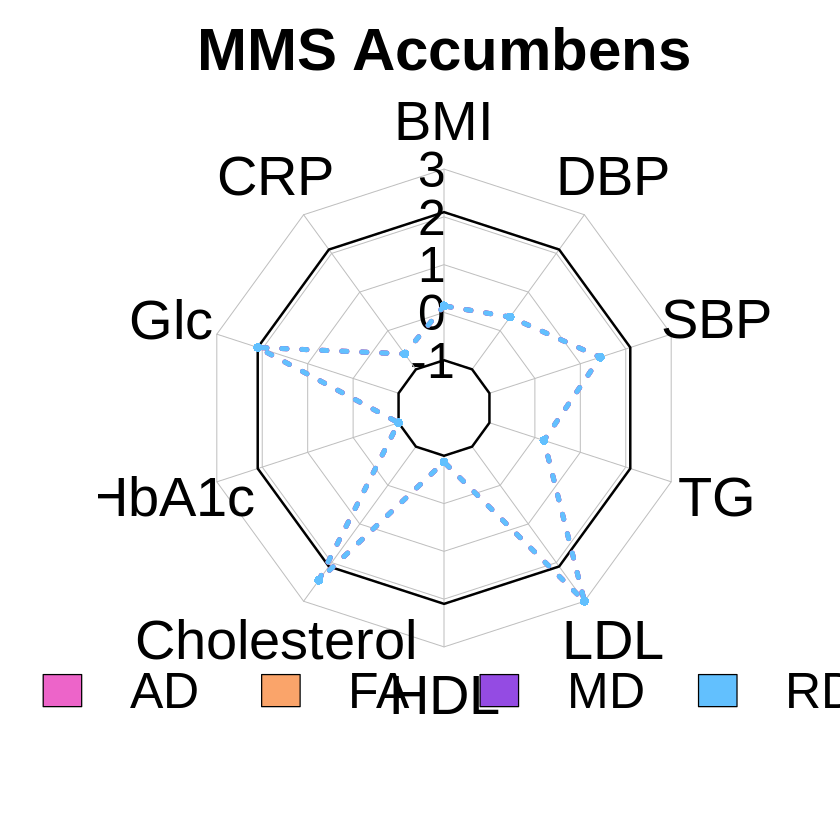

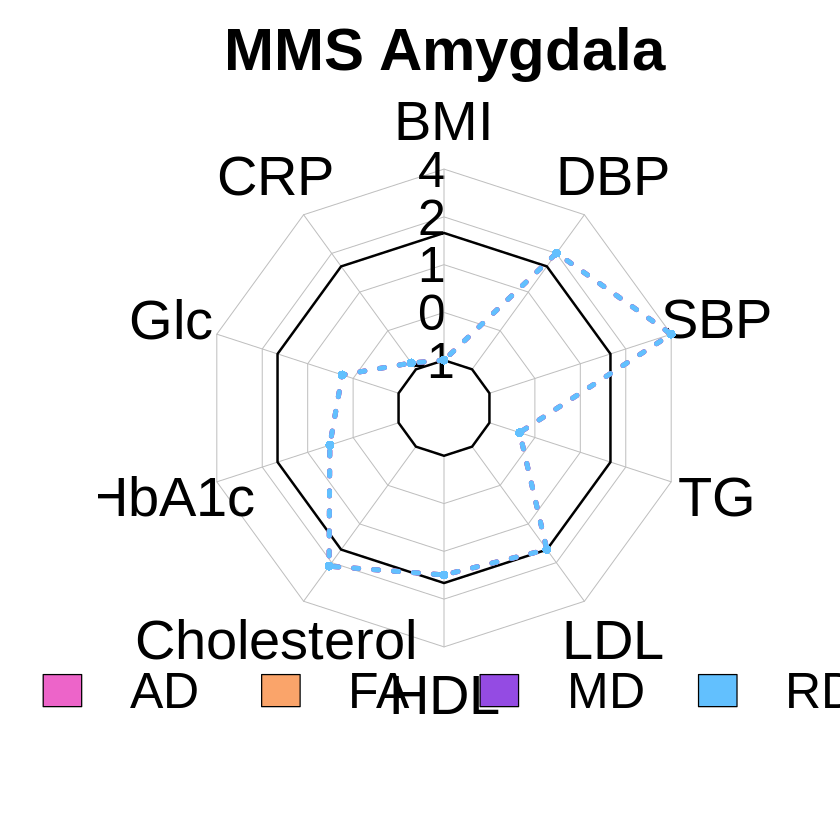

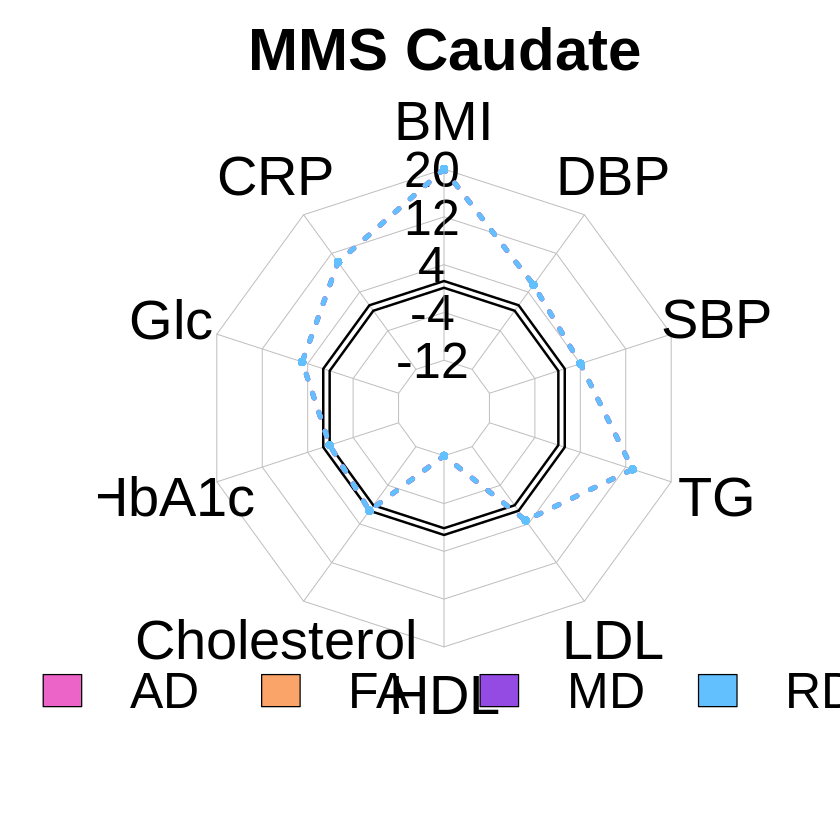

Warning message in min(significant_data$t.value, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(significant_data$t.value, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


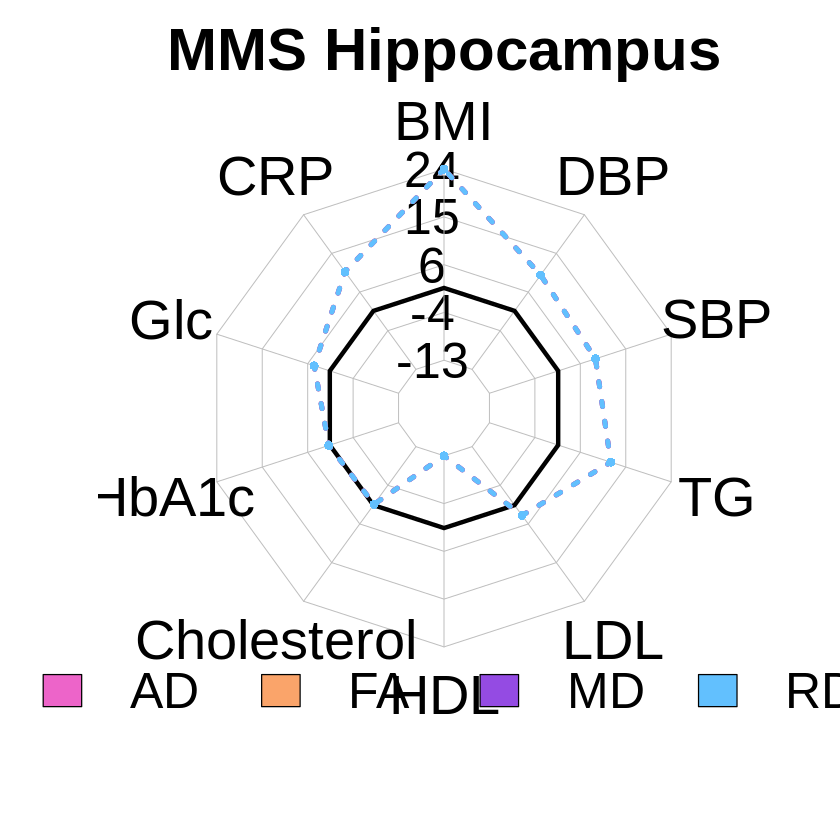

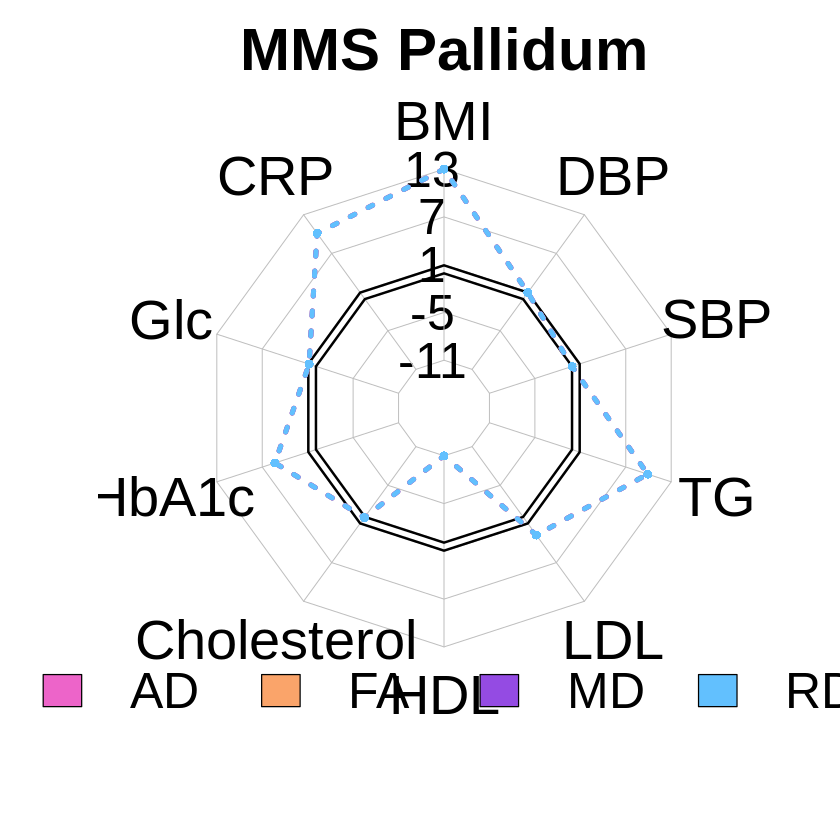

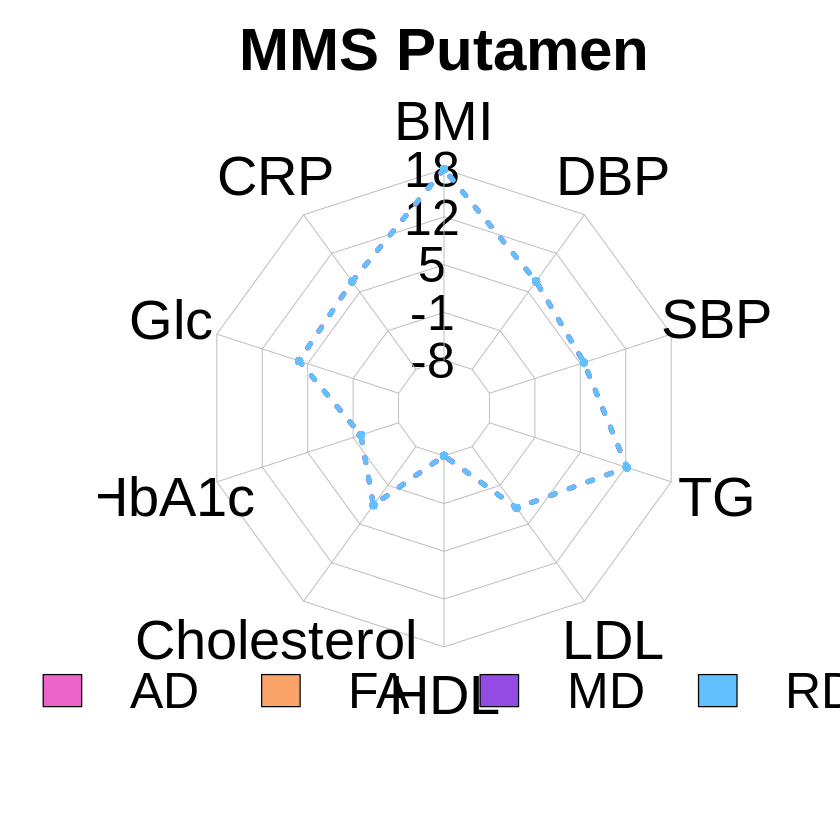

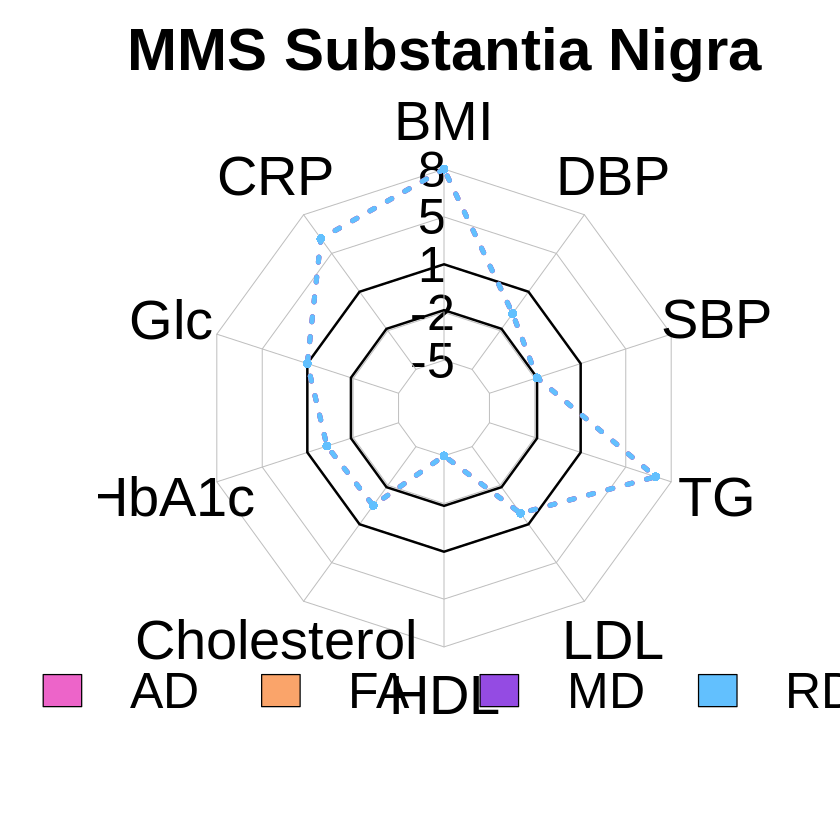

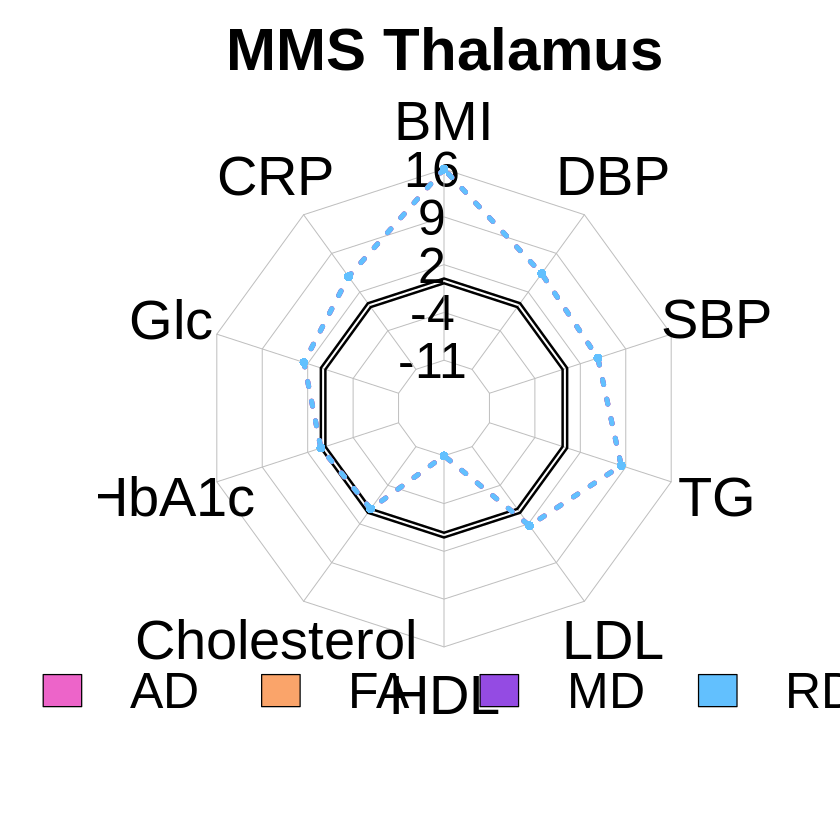

In [89]:
# Define lists and variables for radar charts
vars <- c("BMI", "CRP", "Glucose", "HBA1C", "Cholesterol", "HDL_Chol", "LDL_Chol", "Triglycerides", "Systolic_BP", "Diastolic_BP")
region_data <- list()
region_data_summary <- list()
spider_plots <- list()

# Open TIFF file
#tiff('~/scratch/tractoflow_hcp_dwi/spider_plots/spider_plots_swi_ukbb.tiff', width=8000, height=5000, res=300)

# Set plot parameters
#par(mar=c(3,3,3,3))
#par(mfrow = c(2, 3))

# Loop through brain regions
for (i in 1:length(brain_regions)) {
    # Subset data based on FDR significance
    significant_data <- subset(get(paste(brain_regions[i],"_data_summary",sep="")), p_fdr> 0.05)
    # Calculate min and max t-values
    min_t_val<- min(significant_data$t.value, na.rm = TRUE)
    max_t_val<- max(significant_data$t.value, na.rm = TRUE)
    # Create data frames for min and max t-values
    t_min <- data.frame(t(data.frame(replicate(length(vars), min_t_val))))
    colnames(t_min) <- vars
    t_max <- data.frame(t(data.frame(replicate(length(vars), max_t_val))))
    colnames(t_max) <- vars
    
    # Create a data frame for max and min values
    max_t <- max(get(paste(brain_regions[i],"_data_summary",sep=""))$t.value)
    min_t <- min(get(paste(brain_regions[i],"_data_summary",sep=""))$t.value)
    max_min <- data.frame(
    BMI = c(max_t, min_t), CRP = c(max_t, min_t), Glucose = c(max_t, min_t), 
    HBA1C = c(max_t, min_t), Cholesterol = c(max_t, min_t), HDL_Chol = c(max_t, min_t),
    LDL_Chol = c(max_t, min_t), Triglycerides = c(max_t, min_t), 
    Systolic_BP = c(max_t, min_t), Diastolic_BP = c(max_t, min_t))
    
    # Create data frames for region-specific t-values
    region_data[[1]] <- data.frame(t(get(paste("ad_",brain_regions[i],"_data",sep=""))$t.value))
    colnames(region_data[[1]]) = vars
    region_data[[2]] <- data.frame(t(get(paste("fa_",brain_regions[i],"_data",sep=""))$t.value))
    colnames(region_data[[2]]) = vars
    region_data[[3]] <- data.frame(t(get(paste("md_",brain_regions[i],"_data",sep=""))$t.value))
    colnames(region_data[[3]]) = vars
    region_data[[4]] <- data.frame(t(get(paste("rd_",brain_regions[i],"_data",sep=""))$t.value))
    colnames(region_data[[4]]) = vars

    # Combine region-specific t-values into a summary data frame
    region_data_summary[[i]] <- bind_rows(max_min, region_data[[1]])
    region_data_summary[[i]] <- bind_rows(region_data_summary[i], region_data[[2]])
    region_data_summary[[i]] <- bind_rows(region_data_summary[i], region_data[[3]])
    region_data_summary[[i]] <- bind_rows(region_data_summary[i], region_data[[4]])
    region_data_summary[[i]] <- bind_rows(region_data_summary[i], t_min)
    region_data_summary[[i]] <- bind_rows(region_data_summary[i], t_max)
    rownames(region_data_summary[[i]]) = c("Max", "Min", "AD", "FA", "MD", "RD", "Min_T", "Max_T")
    colnames(region_data_summary[[i]]) = c("BMI", "CRP", "Glc", "HbA1c", "Cholesterol", "HDL", "LDL", "TG", "SBP", "DBP")
    data <- region_data_summary[[i]][c("Max", "Min", "Max_T", "Min_T", "AD", "FA", "MD", "RD"), ]

    # Define colors to be used in radar charts
    my_colors <- c( "black", "black","#ED64C9", "#FAA46A", "#944BE3", "#62C0FE")

    # Generate radar charts
    spider_plots[[i]] <- radarchart(
      data,  
      axistype = 1, 
      caxislabels = round(seq(min_t, max_t, ((max_t - min_t) / 4))), 
      title = paste(regions[i]),
      cex.main=3,
      pcol = my_colors,
      pfcol = c(NA,NA,NA, NA, NA, NA),
      pty = c(32 ,32 ,16, 16, 16, 16),
      plwd = c(2,2,4,4,4,4),  
      plty = c(1,1,3,3,3,3),
      cglcol = "grey", 
      cglty = 1,  
      cglwd = 0.8,
      axislabcol='black',
      seg=4,
      calcex=2.5,
      vlcex=2.8
    )

    # Add legend
    legend(
      "bottom", 
      legend = rownames(data[-c(1, 2, 3, 4), ]),
      fill = my_colors[3:6],
      bty = "n",
      ncol = length(rownames(data[-c(1, 2, 3, 4), ])),  
      cex = 2.5,
      inset = c(0, -0.06), 
      xpd = TRUE  
    )
}

# Close TIFF file
#dev.off()